## Preprocessing and Classification of the German Credit Risk dataset

In this Jupyter Notebook, we will preprocess and classify the German Credit Risk dataset.
This dataset is obtained from:
- https://archive.ics.uci.edu/ml/datasets/Statlog+%28German+Credit+Data%29

- The preprocessing procedure largely follows the preprocessing obtained from:
https://www.kaggle.com/kabure/german-credit-data-with-risk

# 1. Exploratory Data Analysis


Importing the libraries and the dataset

In [43]:
# Loading the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

In [47]:
#Importing the data
df_credit = pd.read_csv(r"C:\Users\Gebruiker\Documents\thesiscode\experimental\raw_datasets\german_credit_raw.csv", index_col=0)
df_credit.head()

Age     Sex  Job Housing Saving accounts Checking account  Credit amount  \
0   67    male    2     own             NaN           little           1169   
1   22  female    2     own          little         moderate           5951   
2   49    male    1     own          little              NaN           2096   
3   45    male    2    free          little           little           7882   
4   53    male    2    free          little           little           4870   

   Duration              Purpose  Risk  
0         6             radio/TV  good  
1        48             radio/TV   bad  
2        12            education  good  
3        42  furniture/equipment  good  
4        24                  car   bad

## 2. Data Exploration 

In [48]:
# Missing values, type of data, shape of data
df_credit.info()
# Most missing values in "saving accounts" and "checking account" attributes


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 62.5+ KB


In [49]:
# Statistics of dataset
# General overview of data (e.g type of data, missing values)
# df_credit.info()
df_credit.describe()


Age          Job  Credit amount     Duration
count  1000.000000  1000.000000    1000.000000  1000.000000
mean     35.546000     1.904000    3271.258000    20.903000
std      11.375469     0.653614    2822.736876    12.058814
min      19.000000     0.000000     250.000000     4.000000
25%      27.000000     2.000000    1365.500000    12.000000
50%      33.000000     2.000000    2319.500000    18.000000
75%      42.000000     2.000000    3972.250000    24.000000
max      75.000000     3.000000   18424.000000    72.000000

In [6]:
# Number of unique values
df_credit.nunique()

Age                  53
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       921
Duration             33
Purpose               8
Risk                  2
dtype: int64

## What is the age distribution within this dataset?
On average, the younger the age of the loan applicants is, the more likely they have a good risk score. 

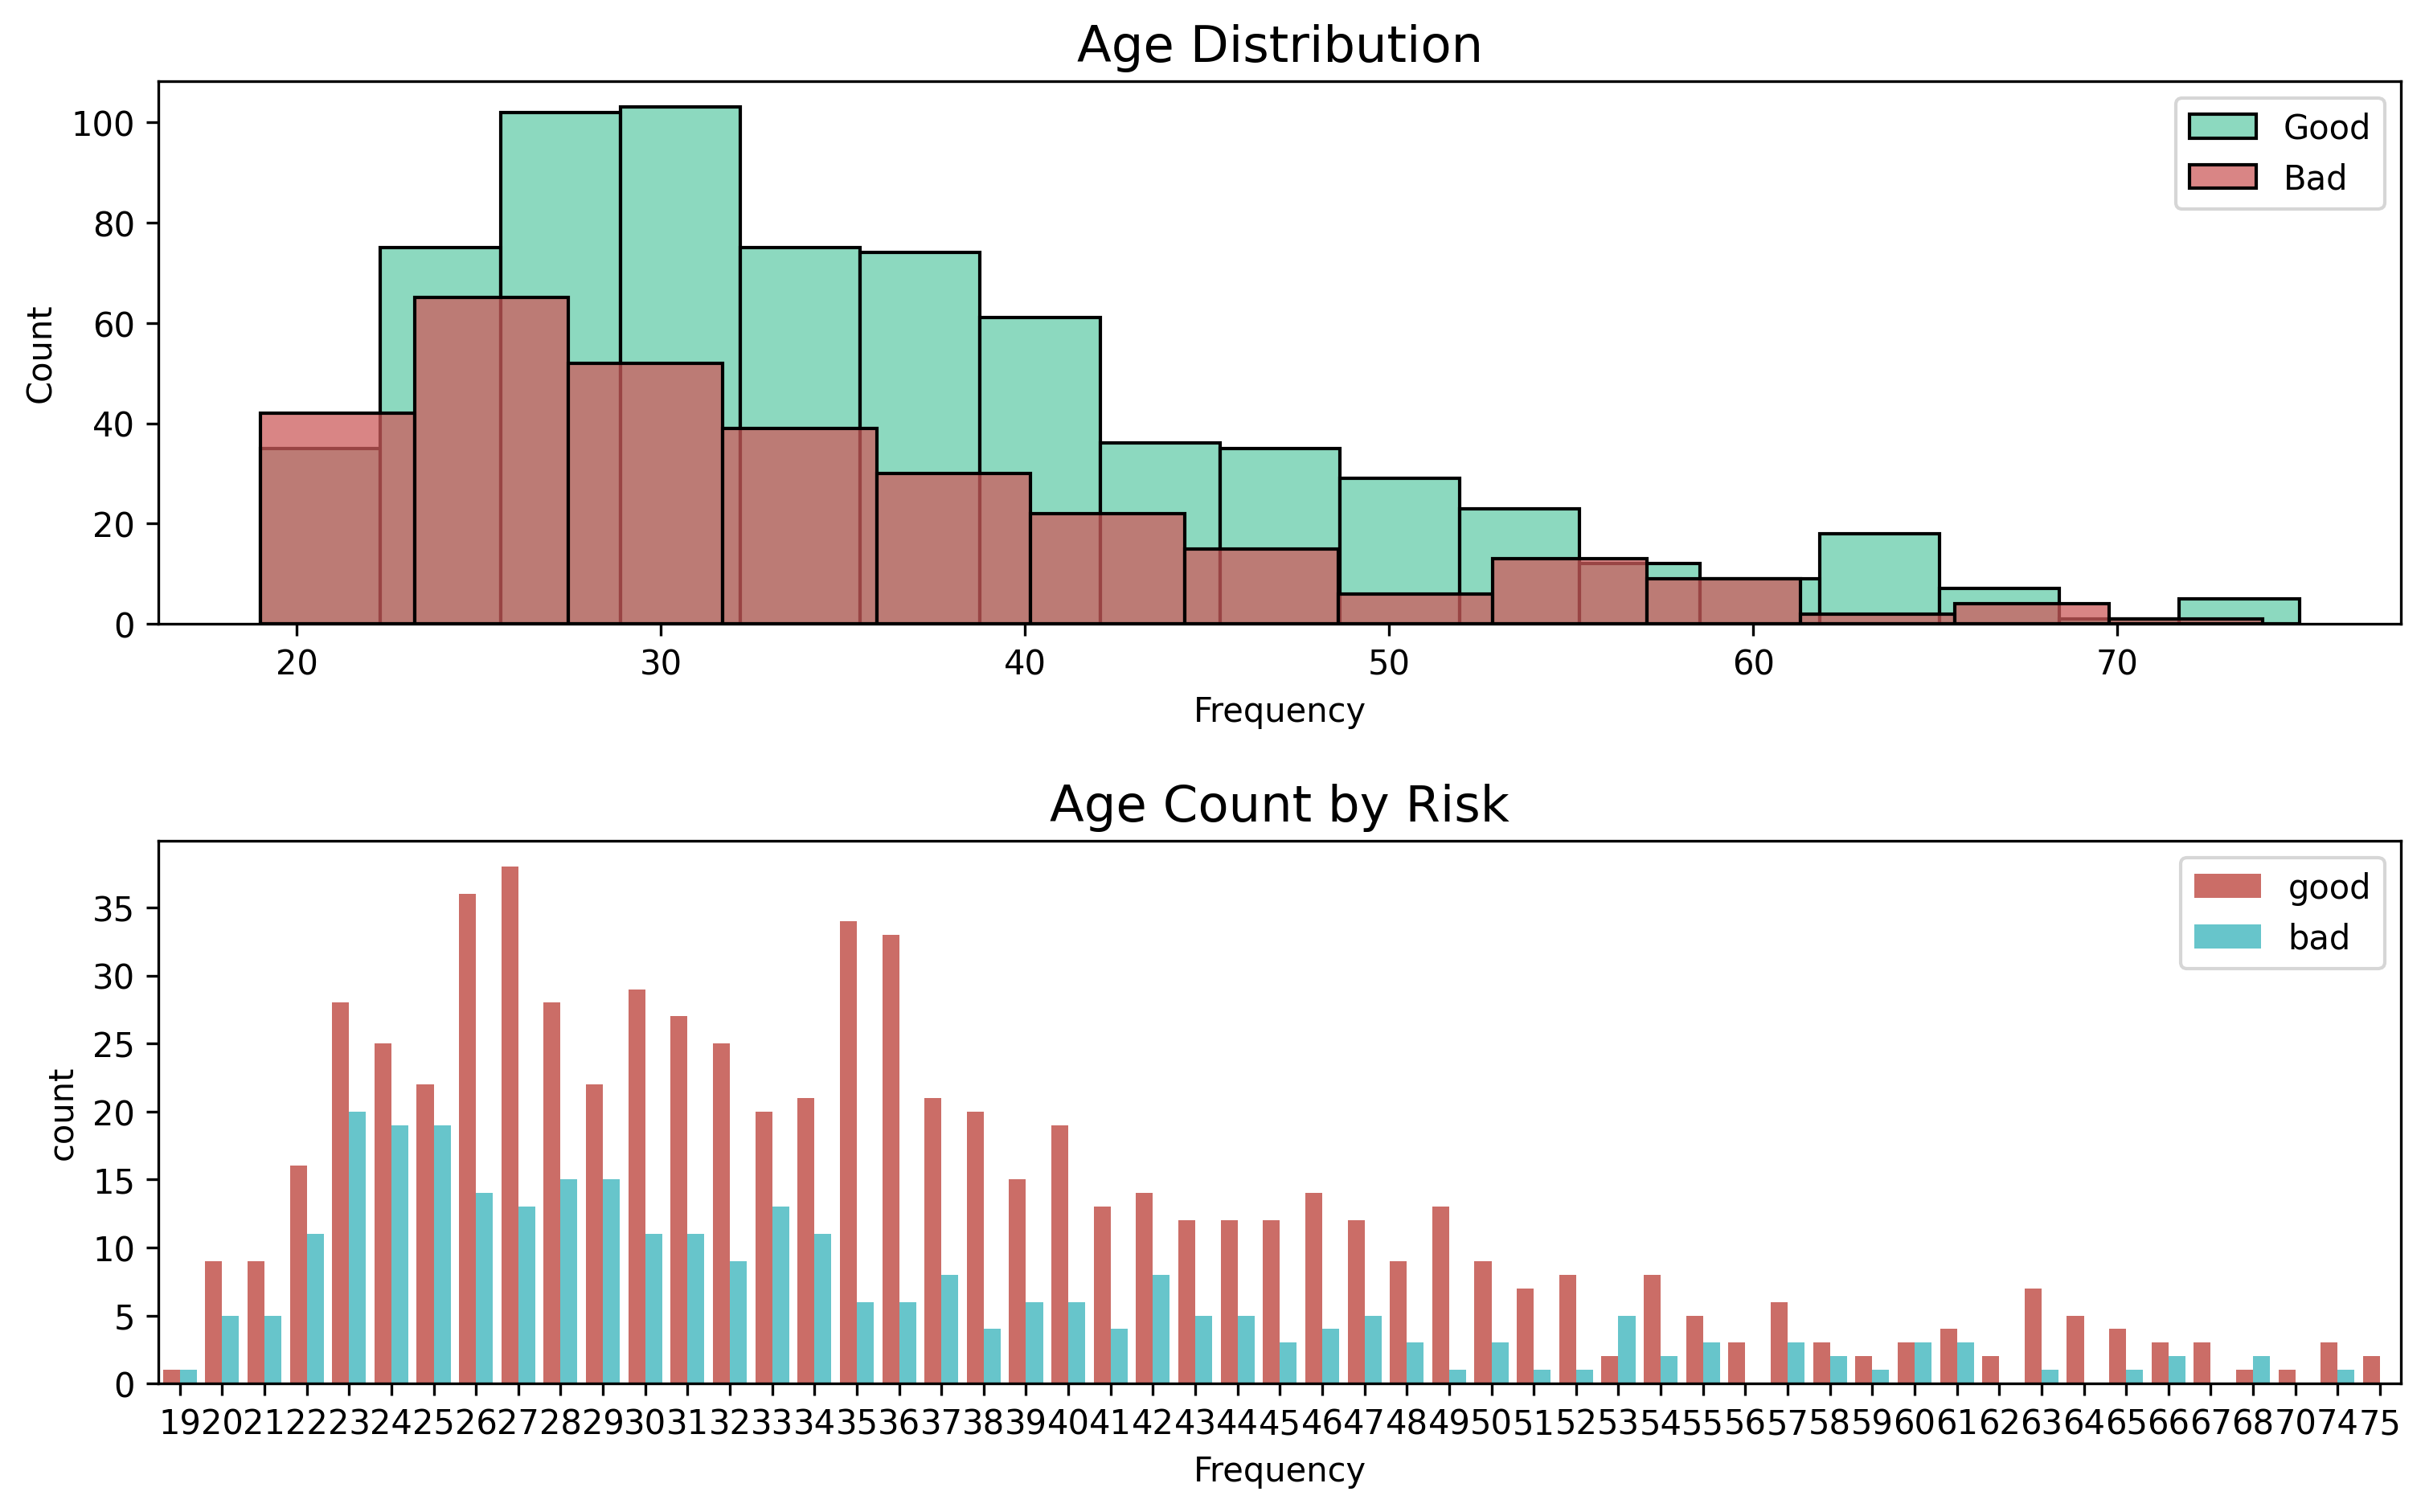

In [50]:
# Matplotlib graphs: depends on which attributes may seem sensitive
df_good = df_credit[df_credit["Risk"] == 'good']
df_bad = df_credit[df_credit["Risk"] == 'bad']

fig, ax = plt.subplots(nrows=2, figsize=(12,8))
plt.subplots_adjust(hspace = 0.4, top = 0.8)

g1 = sns.histplot(df_good["Age"], ax=ax[0], 
             color="mediumaquamarine", label='Good')
g1 = sns.histplot(df_bad["Age"], ax=ax[0], 
             color='indianred', label='Bad')
g1.set_title("Age Distribution", fontsize=15)
g1.set_xlabel("Age")
g1.set_xlabel("Frequency")
g1.legend()


g2 = sns.countplot(x="Age",data=df_credit, 
              palette="hls", ax=ax[1], 
              hue = "Risk")
g2.set_title("Age Count by Risk", fontsize=15)
g2.set_xlabel("Age")
g2.set_xlabel("Frequency")
g2.legend(loc='upper right')
plt.show()

## What is the gender distribution of the persons in this dataset?

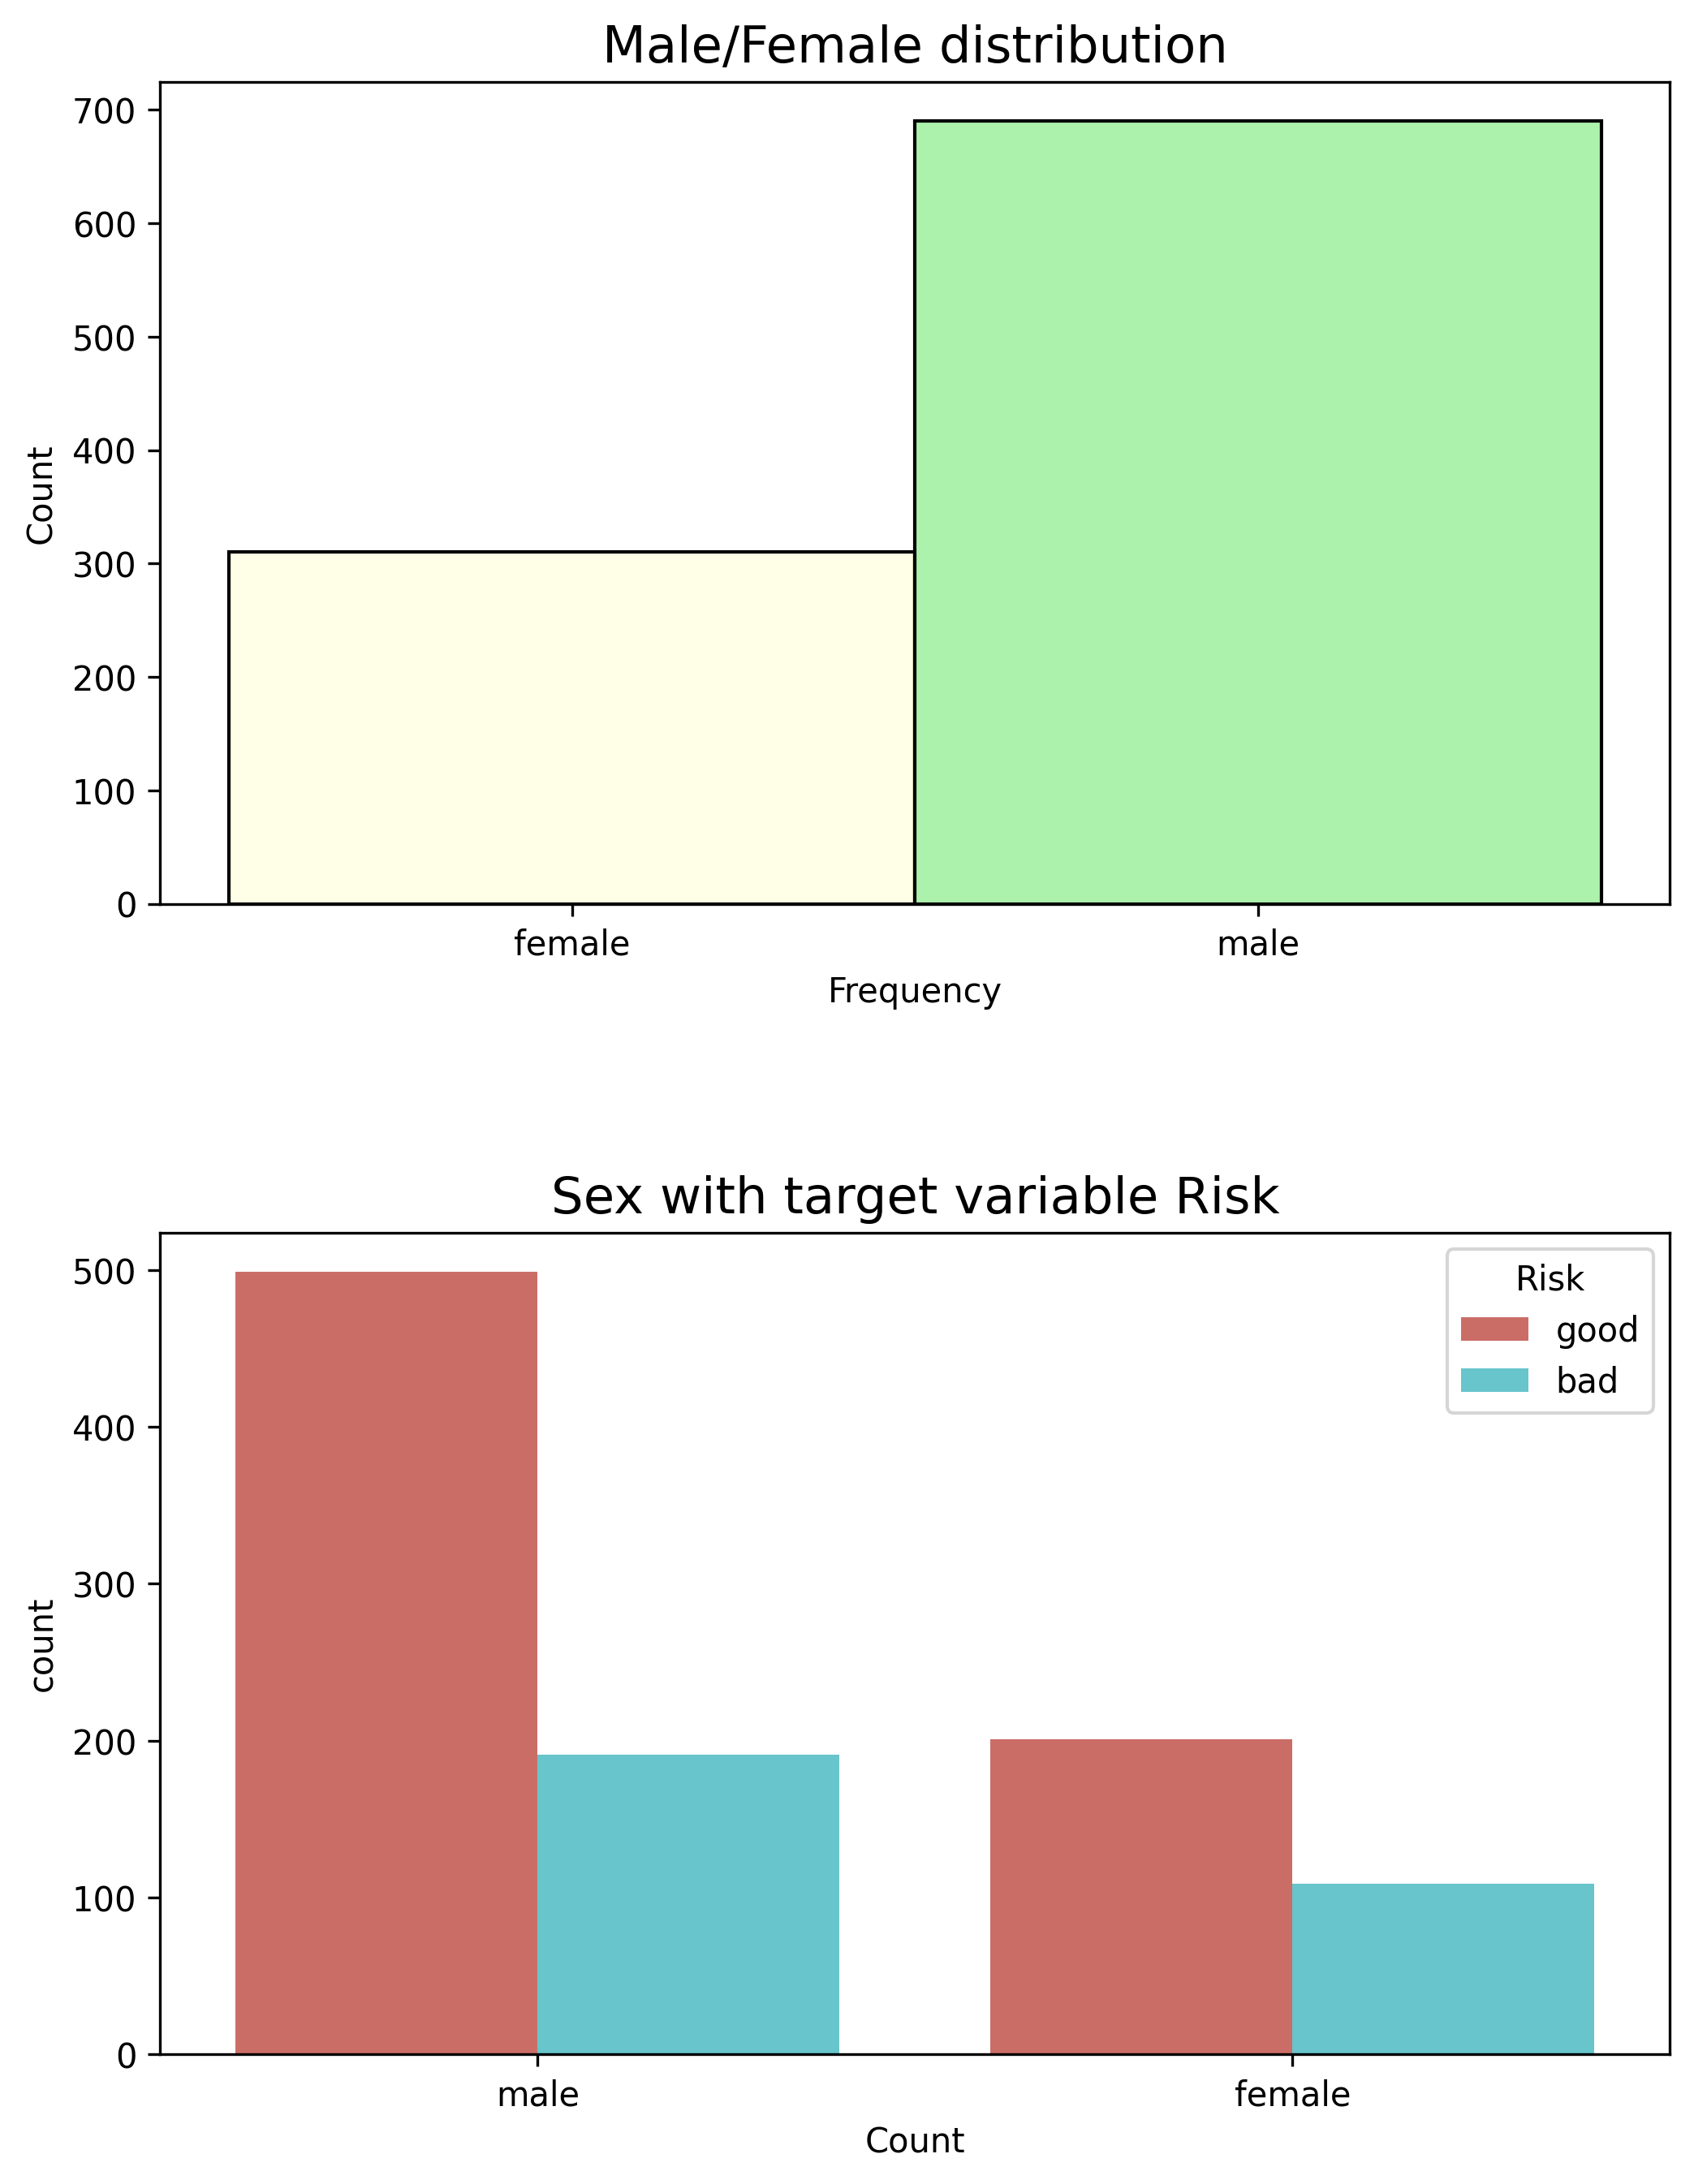

In [51]:
df_male = df_credit[df_credit["Sex"] == 'male']
df_female = df_credit[df_credit["Sex"] == 'female']

fig, ax = plt.subplots(nrows=2, figsize=(8,12))
plt.subplots_adjust(hspace = 0.4, top = 0.8)

g1 = sns.histplot(df_female["Sex"], ax=ax[0], 
             color="lightyellow")
g1 = sns.histplot(df_male["Sex"], ax=ax[0], 
             color='lightgreen')
g1.set_title("Male/Female distribution", fontsize=15)
g1.set_xlabel("Sex")
g1.set_xlabel("Frequency")

g2 = sns.countplot(x="Sex",data=df_credit, 
              palette="hls", ax=ax[1], 
              hue = "Risk")
g2.set_title("Sex with target variable Risk", fontsize=15)
g2.set_xlabel("Sex")
g2.set_xlabel("Count")
plt.show()

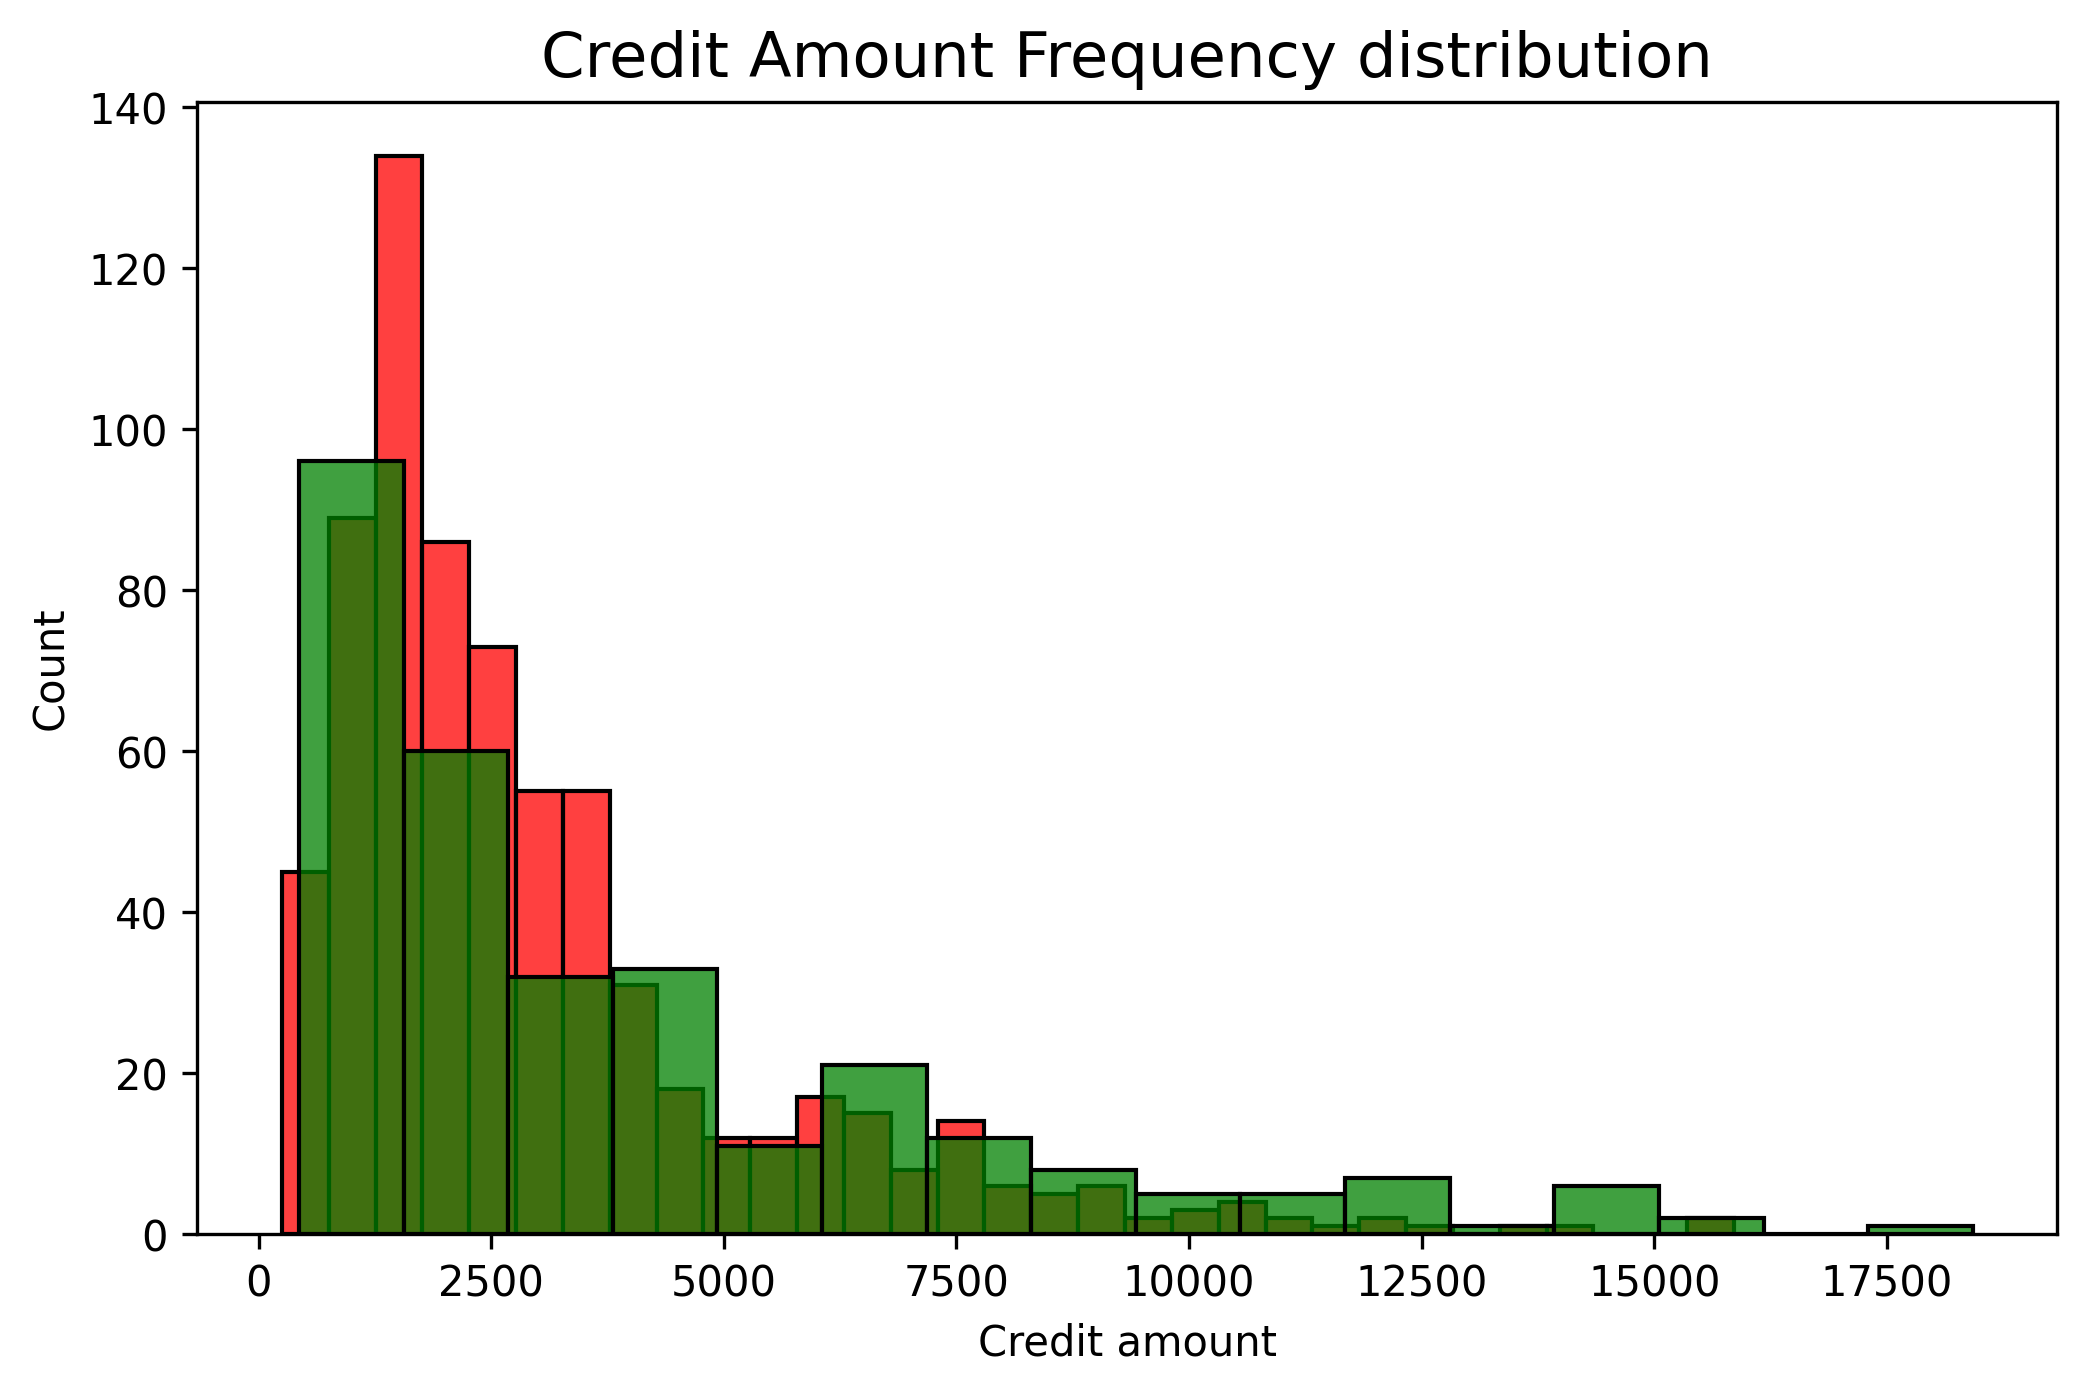

In [10]:
# Investigating the credit amount
plt.figure(figsize = (8,5))

g= sns.histplot(df_good['Credit amount'], color='r')
g = sns.histplot(df_bad['Credit amount'], color='g')
g.set_title("Credit Amount Frequency distribution", fontsize=15)
plt.show()

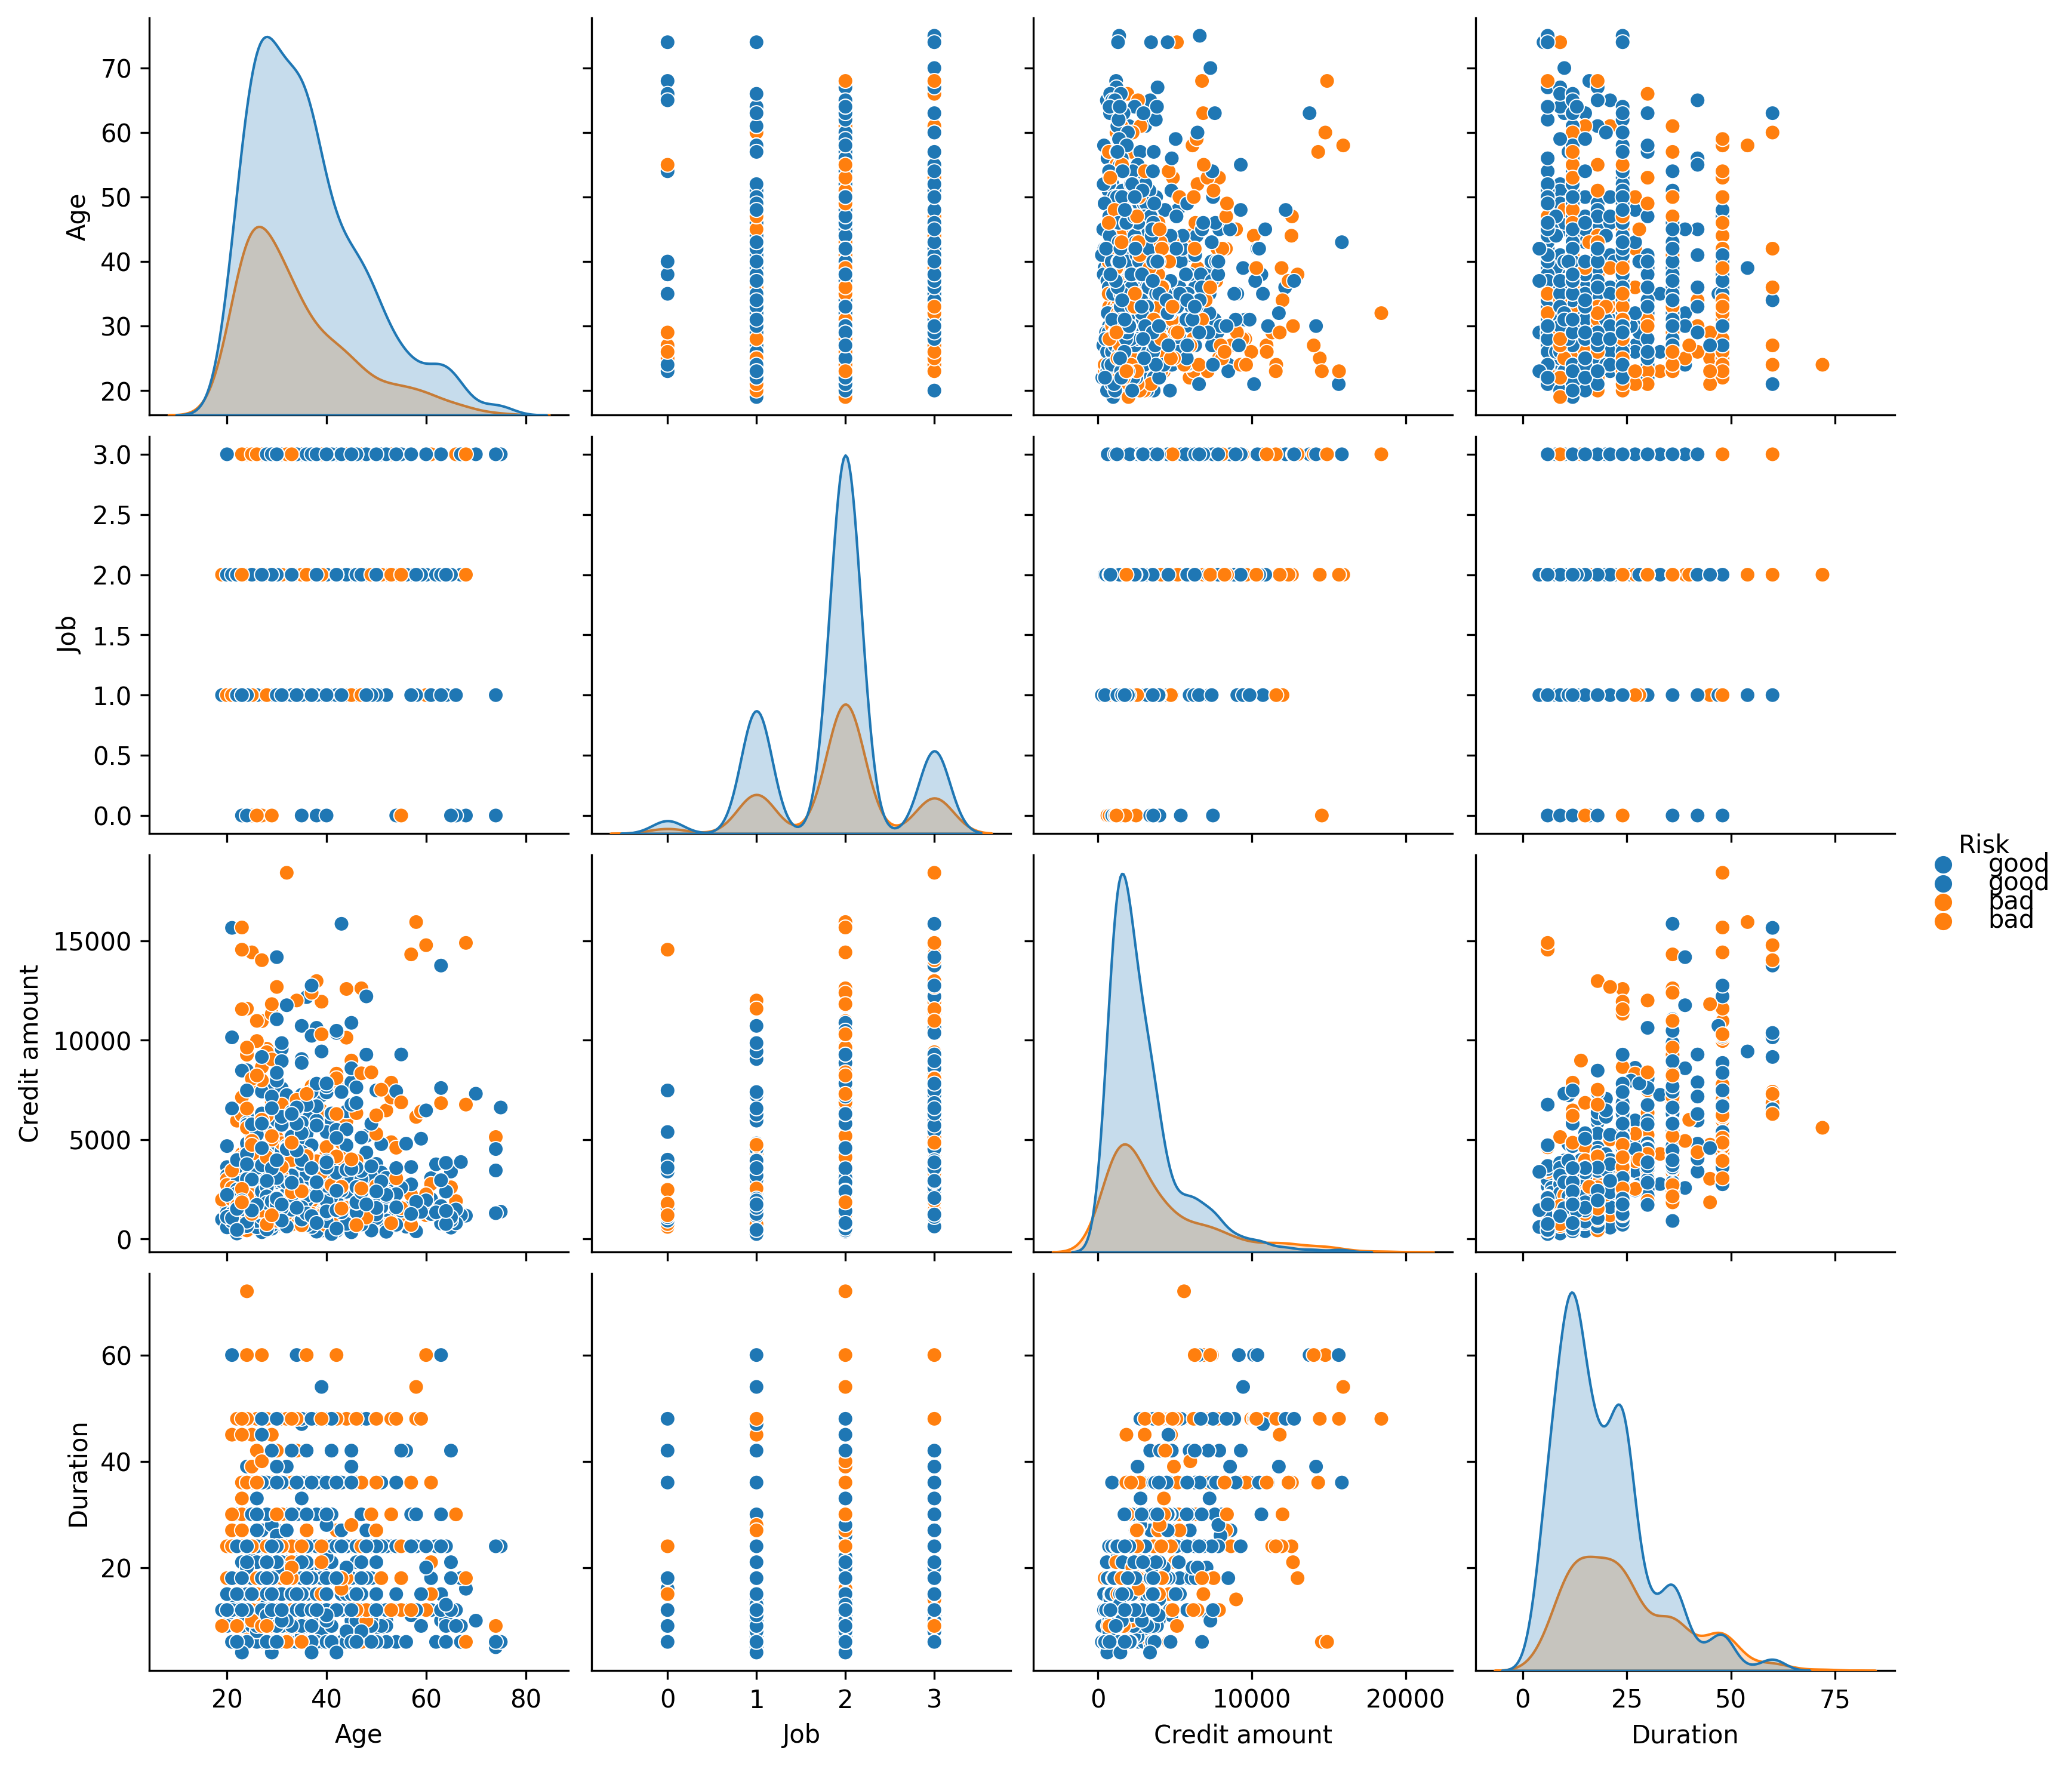

In [52]:
# Plotting with Seaborn
X = df_credit[['Age','Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk']]
plot = sns.pairplot(X, hue="Risk")
# plot.set_title('Pairwise Relationships of Features')

plot.add_legend(title="", adjust_subtitles=True)

In [53]:
print(pd.crosstab(df_credit.Sex, df_credit.Job))

Job      0    1    2    3
Sex                      
female  12   64  197   37
male    10  136  433  111


In [54]:
print(pd.crosstab(df_credit["Checking account"],df_credit.Sex))

Sex               female  male
Checking account              
little                88   186
moderate              86   183
rich                  20    43


In [55]:
pd.crosstab(df_credit.Purpose, df_credit.Risk).style.background_gradient(cmap = cm)

Text(0.5, 1.0, 'Purposes per Risk Class')

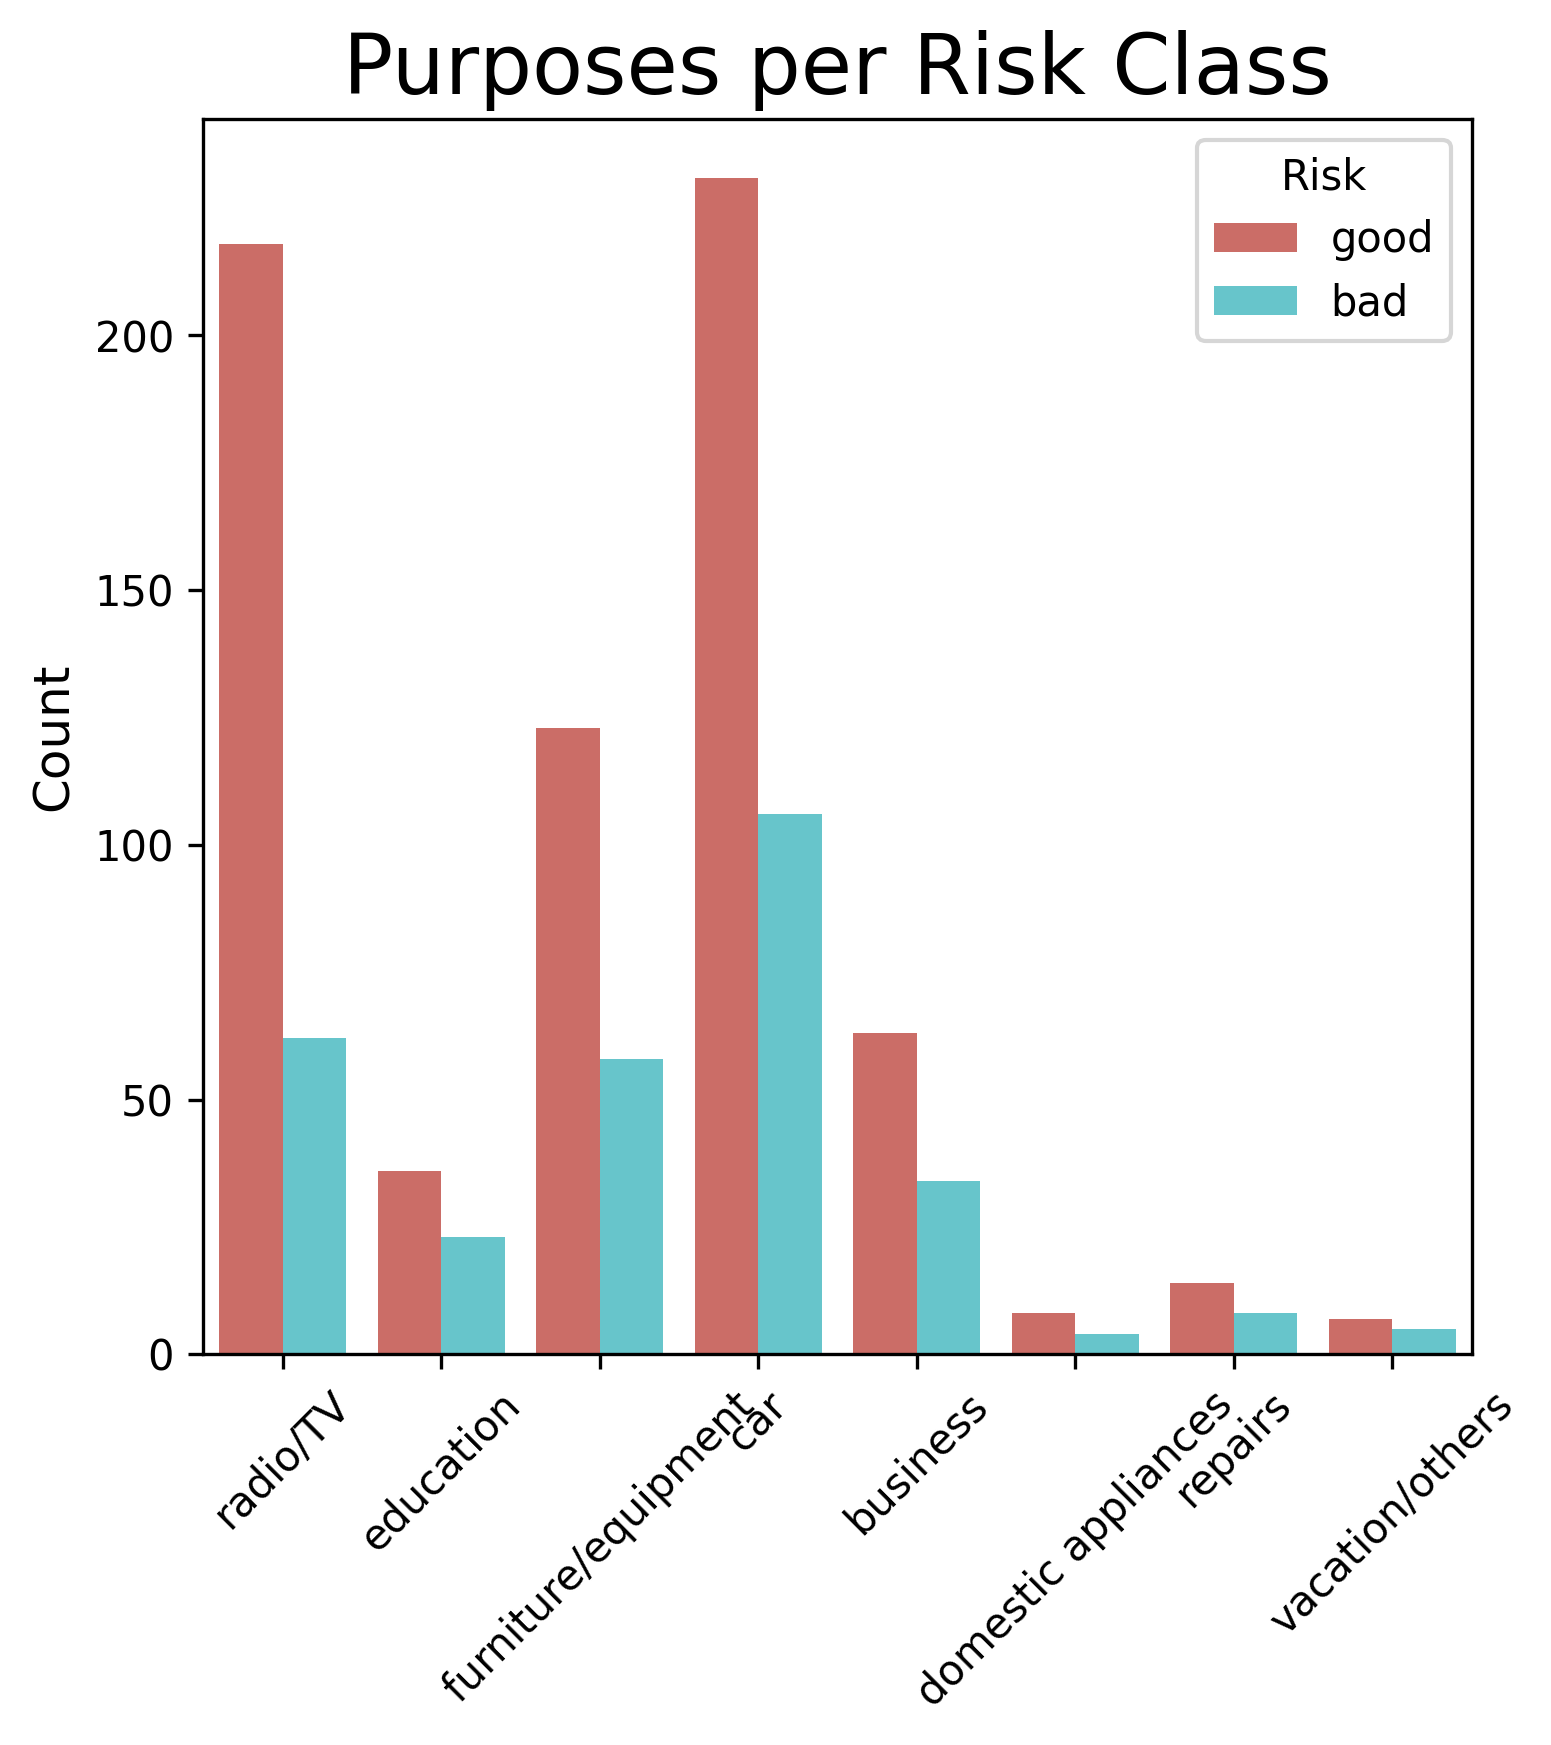

In [12]:
plt.figure(figsize = (12,12))

plt.subplot(221)
g = sns.countplot(x="Purpose", data=df_credit, 
              palette="hls", hue = "Risk")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Count", fontsize=12)
g.set_title("Purposes per Risk Class", fontsize=20)

In [59]:
# Creating a categorical variable to handle with the age variable

#Let's look the Credit Amount column
interval = (18, 25, 35, 60, 120)
cats = ['Student', 'Young', 'Adult', 'Senior']
df_credit["Age_cat"] = pd.cut(df_credit.Age, interval, labels=cats)


## What are the occupations of the males and females in this dataset?

In [65]:
pd.crosstab(df_credit.Purpose, df_credit.Sex).style.background_gradient(cmap = cm)

Text(0.5, 1.0, 'Purposes per Sex')

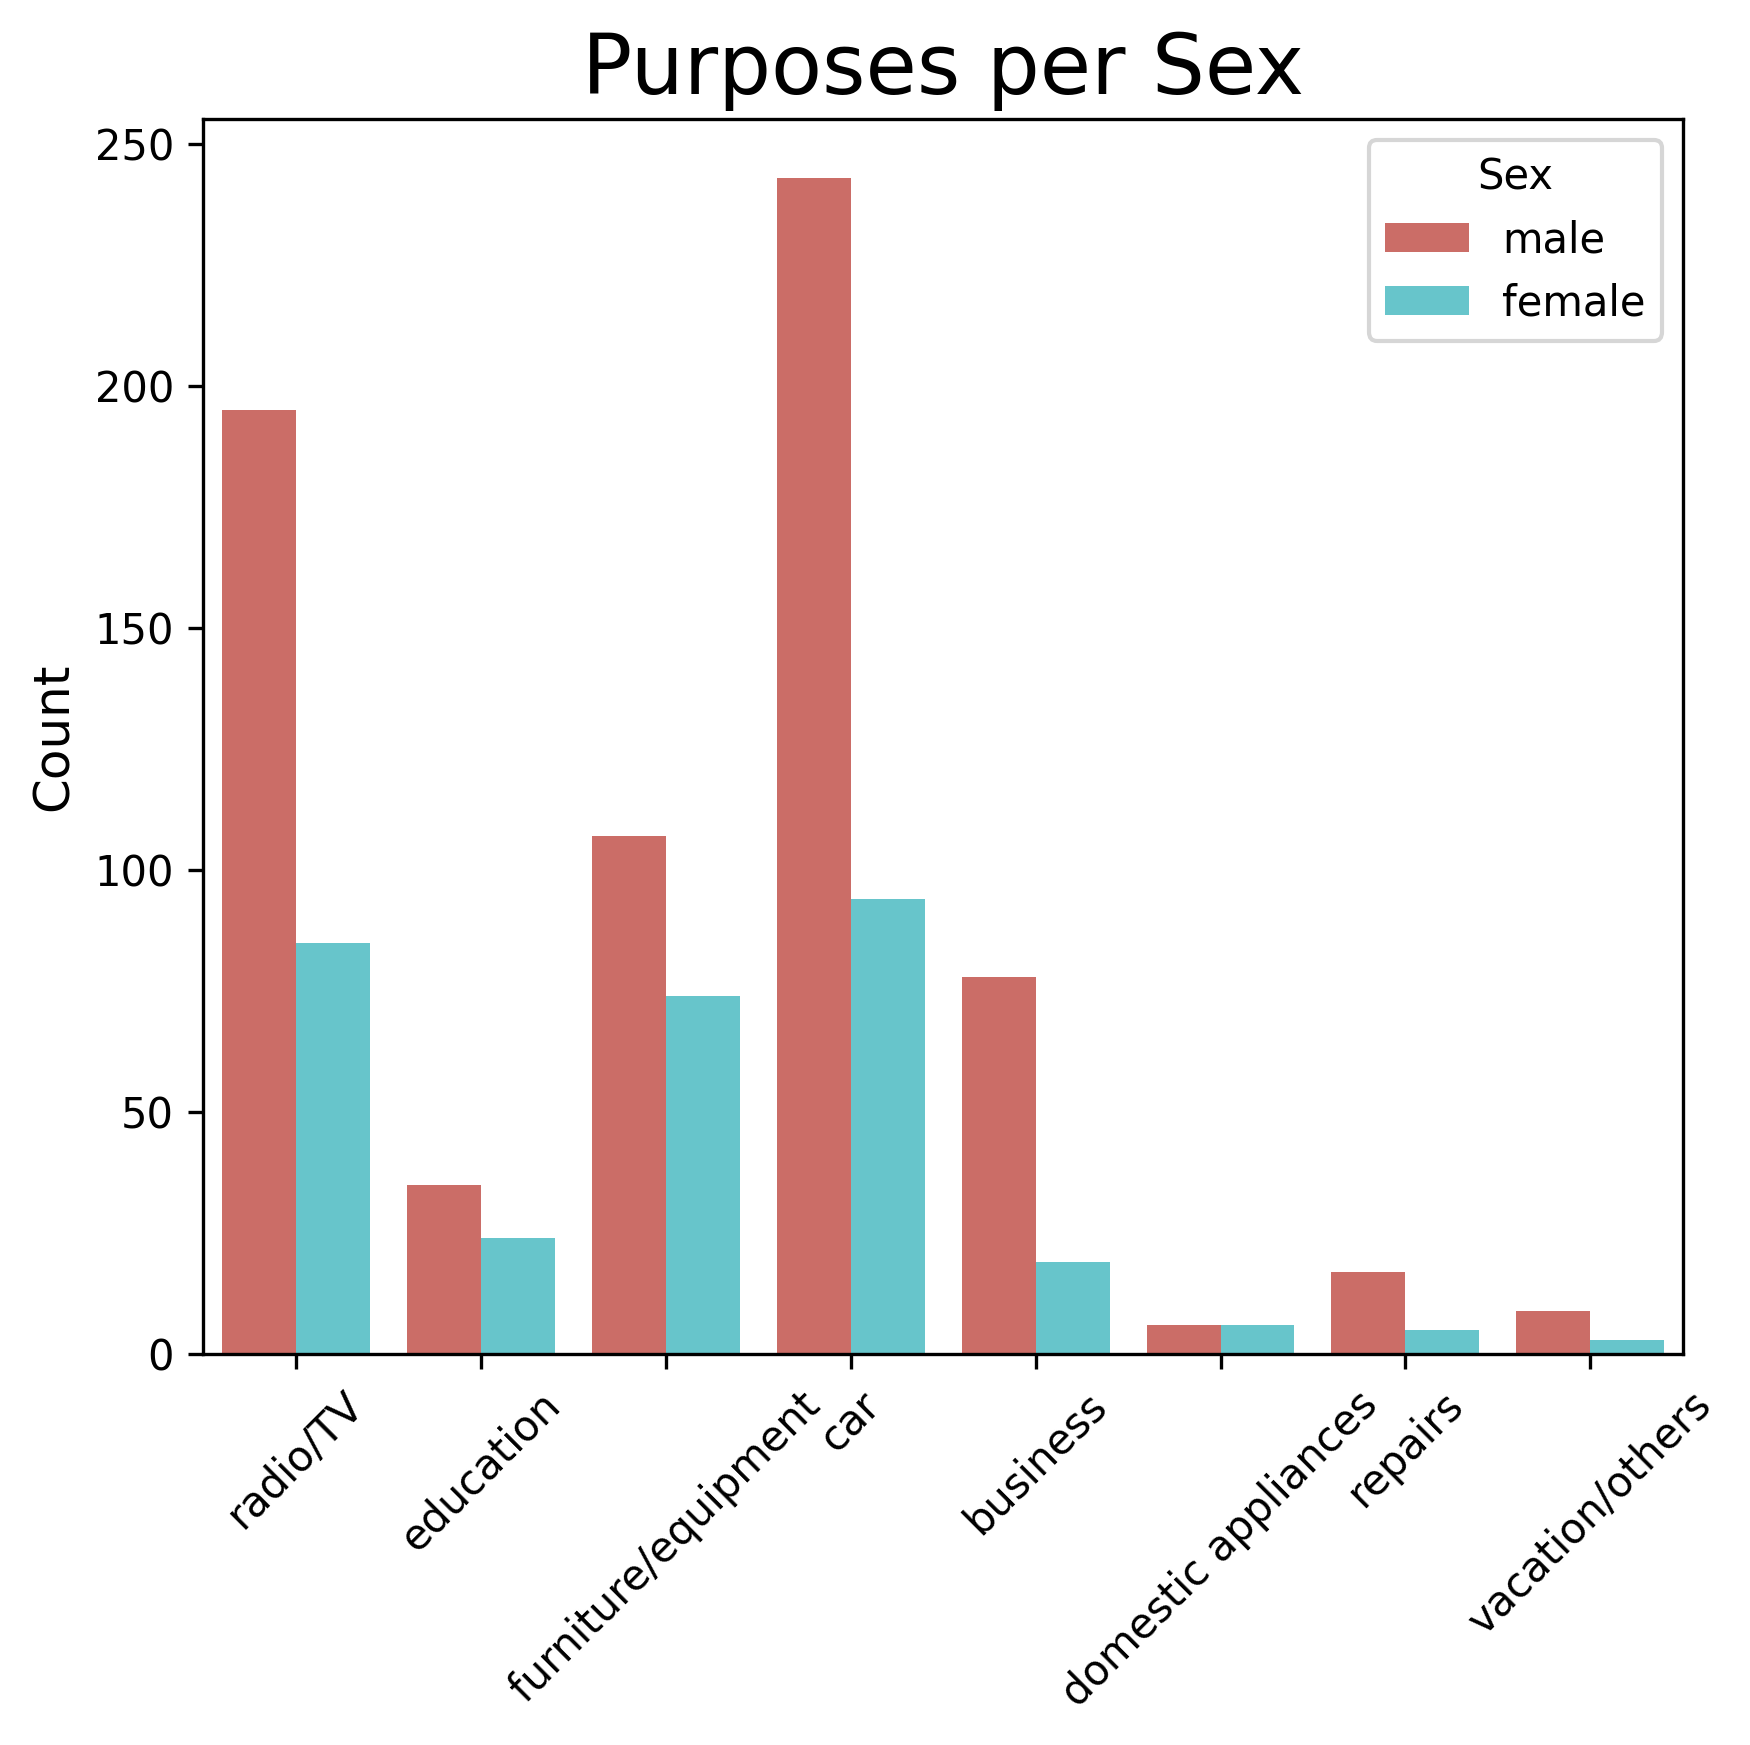

In [15]:
plt.figure(figsize = (14,12))

plt.subplot(221)
g3 = sns.countplot(x="Purpose", data=df_credit, 
              palette="hls", hue = "Sex")
g3.set_xticklabels(g3.get_xticklabels(),rotation=45)
g3.set_xlabel("", fontsize=12)
g3.set_ylabel("Count", fontsize=12)
g3.set_title("Purposes per Sex", fontsize=20)

In [60]:
print("Purpose : ",df_credit.Purpose.unique())
print("Sex : ",df_credit.Sex.unique())
print("Housing : ",df_credit.Housing.unique())
print("Saving accounts : ",df_credit['Saving accounts'].unique())
print("Risk : ",df_credit['Risk'].unique())
print("Checking account : ",df_credit['Checking account'].unique())
print("Age_cat : ",df_credit['Age_cat'].unique())

Purpose :  ['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']
Sex :  ['male' 'female']
Housing :  ['own' 'free' 'rent']
Saving accounts :  [nan 'little' 'quite rich' 'rich' 'moderate']
Risk :  ['good' 'bad']
Checking account :  ['little' 'moderate' nan 'rich']
Age_cat :  ['Senior', 'Student', 'Adult', 'Young']
Categories (4, object): ['Student' < 'Young' < 'Adult' < 'Senior']


## Data Preprocessing

Encoding the categorical features into dummies

In [61]:
def one_hot_encoder(df, nan_as_category = False):
    original_columns = list(df.columns)
    categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
    df = pd.get_dummies(df, columns= categorical_columns, dummy_na= nan_as_category, drop_first=True)
    new_columns = [c for c in df.columns if c not in original_columns]
    return df, new_columns

In [62]:
df_credit['Saving accounts'] = df_credit['Saving accounts'].fillna('no_inf')
df_credit['Checking account'] = df_credit['Checking account'].fillna('no_inf')

#Purpose to Dummies Variable
df_credit = df_credit.merge(pd.get_dummies(df_credit.Purpose, drop_first=True, prefix='Purpose'), left_index=True, right_index=True)
#Sex feature in dummies
df_credit = df_credit.merge(pd.get_dummies(df_credit.Sex, drop_first=True, prefix='Sex'), left_index=True, right_index=True)
# Housing get dummies
df_credit = df_credit.merge(pd.get_dummies(df_credit.Housing, drop_first=True, prefix='Housing'), left_index=True, right_index=True)
# Housing get Saving Accounts
df_credit = df_credit.merge(pd.get_dummies(df_credit["Saving accounts"], drop_first=True, prefix='Savings'), left_index=True, right_index=True)
# Housing get Risk
df_credit = df_credit.merge(pd.get_dummies(df_credit.Risk, prefix='Risk'), left_index=True, right_index=True)
# Housing get Checking Account
df_credit = df_credit.merge(pd.get_dummies(df_credit["Checking account"], drop_first=True, prefix='Check'), left_index=True, right_index=True)
# Housing get Age categorical
df_credit = df_credit.merge(pd.get_dummies(df_credit["Age_cat"], drop_first=True, prefix='Age_cat'), left_index=True, right_index=True)

In [63]:
df_credit.head()

Age     Sex  Job Housing Saving accounts Checking account  Credit amount  \
0   67    male    2     own          no_inf           little           1169   
1   22  female    2     own          little         moderate           5951   
2   49    male    1     own          little           no_inf           2096   
3   45    male    2    free          little           little           7882   
4   53    male    2    free          little           little           4870   

   Duration              Purpose  Risk  ... Savings_quite rich  Savings_rich  \
0         6             radio/TV  good  ...                  0             0   
1        48             radio/TV   bad  ...                  0             0   
2        12            education  good  ...                  0             0   
3        42  furniture/equipment  good  ...                  0             0   
4        24                  car   bad  ...                  0             0   

   Risk_bad  Risk_good  Check_moderate  Check_no_inf  Check_rich  \
0         0          1               0             0           0   
1         1          0               1             0           0   
2         0          1               0             1           0   
3         0          1               0             0           0   
4         1          0               0             0           0   

   Age_cat_Young  Age_cat_Adult  Age_cat_Senior  
0              0              0               1  
1              0              0               0  
2              0              1               0  
3              0              1               0  
4              0              1               0  

[5 rows x 33 columns]

In [64]:
# Deleting the old features

#Excluding the missing columns
del df_credit["Saving accounts"]
del df_credit["Checking account"]
del df_credit["Purpose"]
del df_credit["Sex"]
del df_credit["Housing"]
del df_credit["Age_cat"]
del df_credit["Risk"]
del df_credit['Risk_good']

In [66]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Age                          1000 non-null   int64
 1   Job                          1000 non-null   int64
 2   Credit amount                1000 non-null   int64
 3   Duration                     1000 non-null   int64
 4   Purpose_car                  1000 non-null   uint8
 5   Purpose_domestic appliances  1000 non-null   uint8
 6   Purpose_education            1000 non-null   uint8
 7   Purpose_furniture/equipment  1000 non-null   uint8
 8   Purpose_radio/TV             1000 non-null   uint8
 9   Purpose_repairs              1000 non-null   uint8
 10  Purpose_vacation/others      1000 non-null   uint8
 11  Sex_male                     1000 non-null   uint8
 12  Housing_own                  1000 non-null   uint8
 13  Housing_rent                 1000 non-null   uint

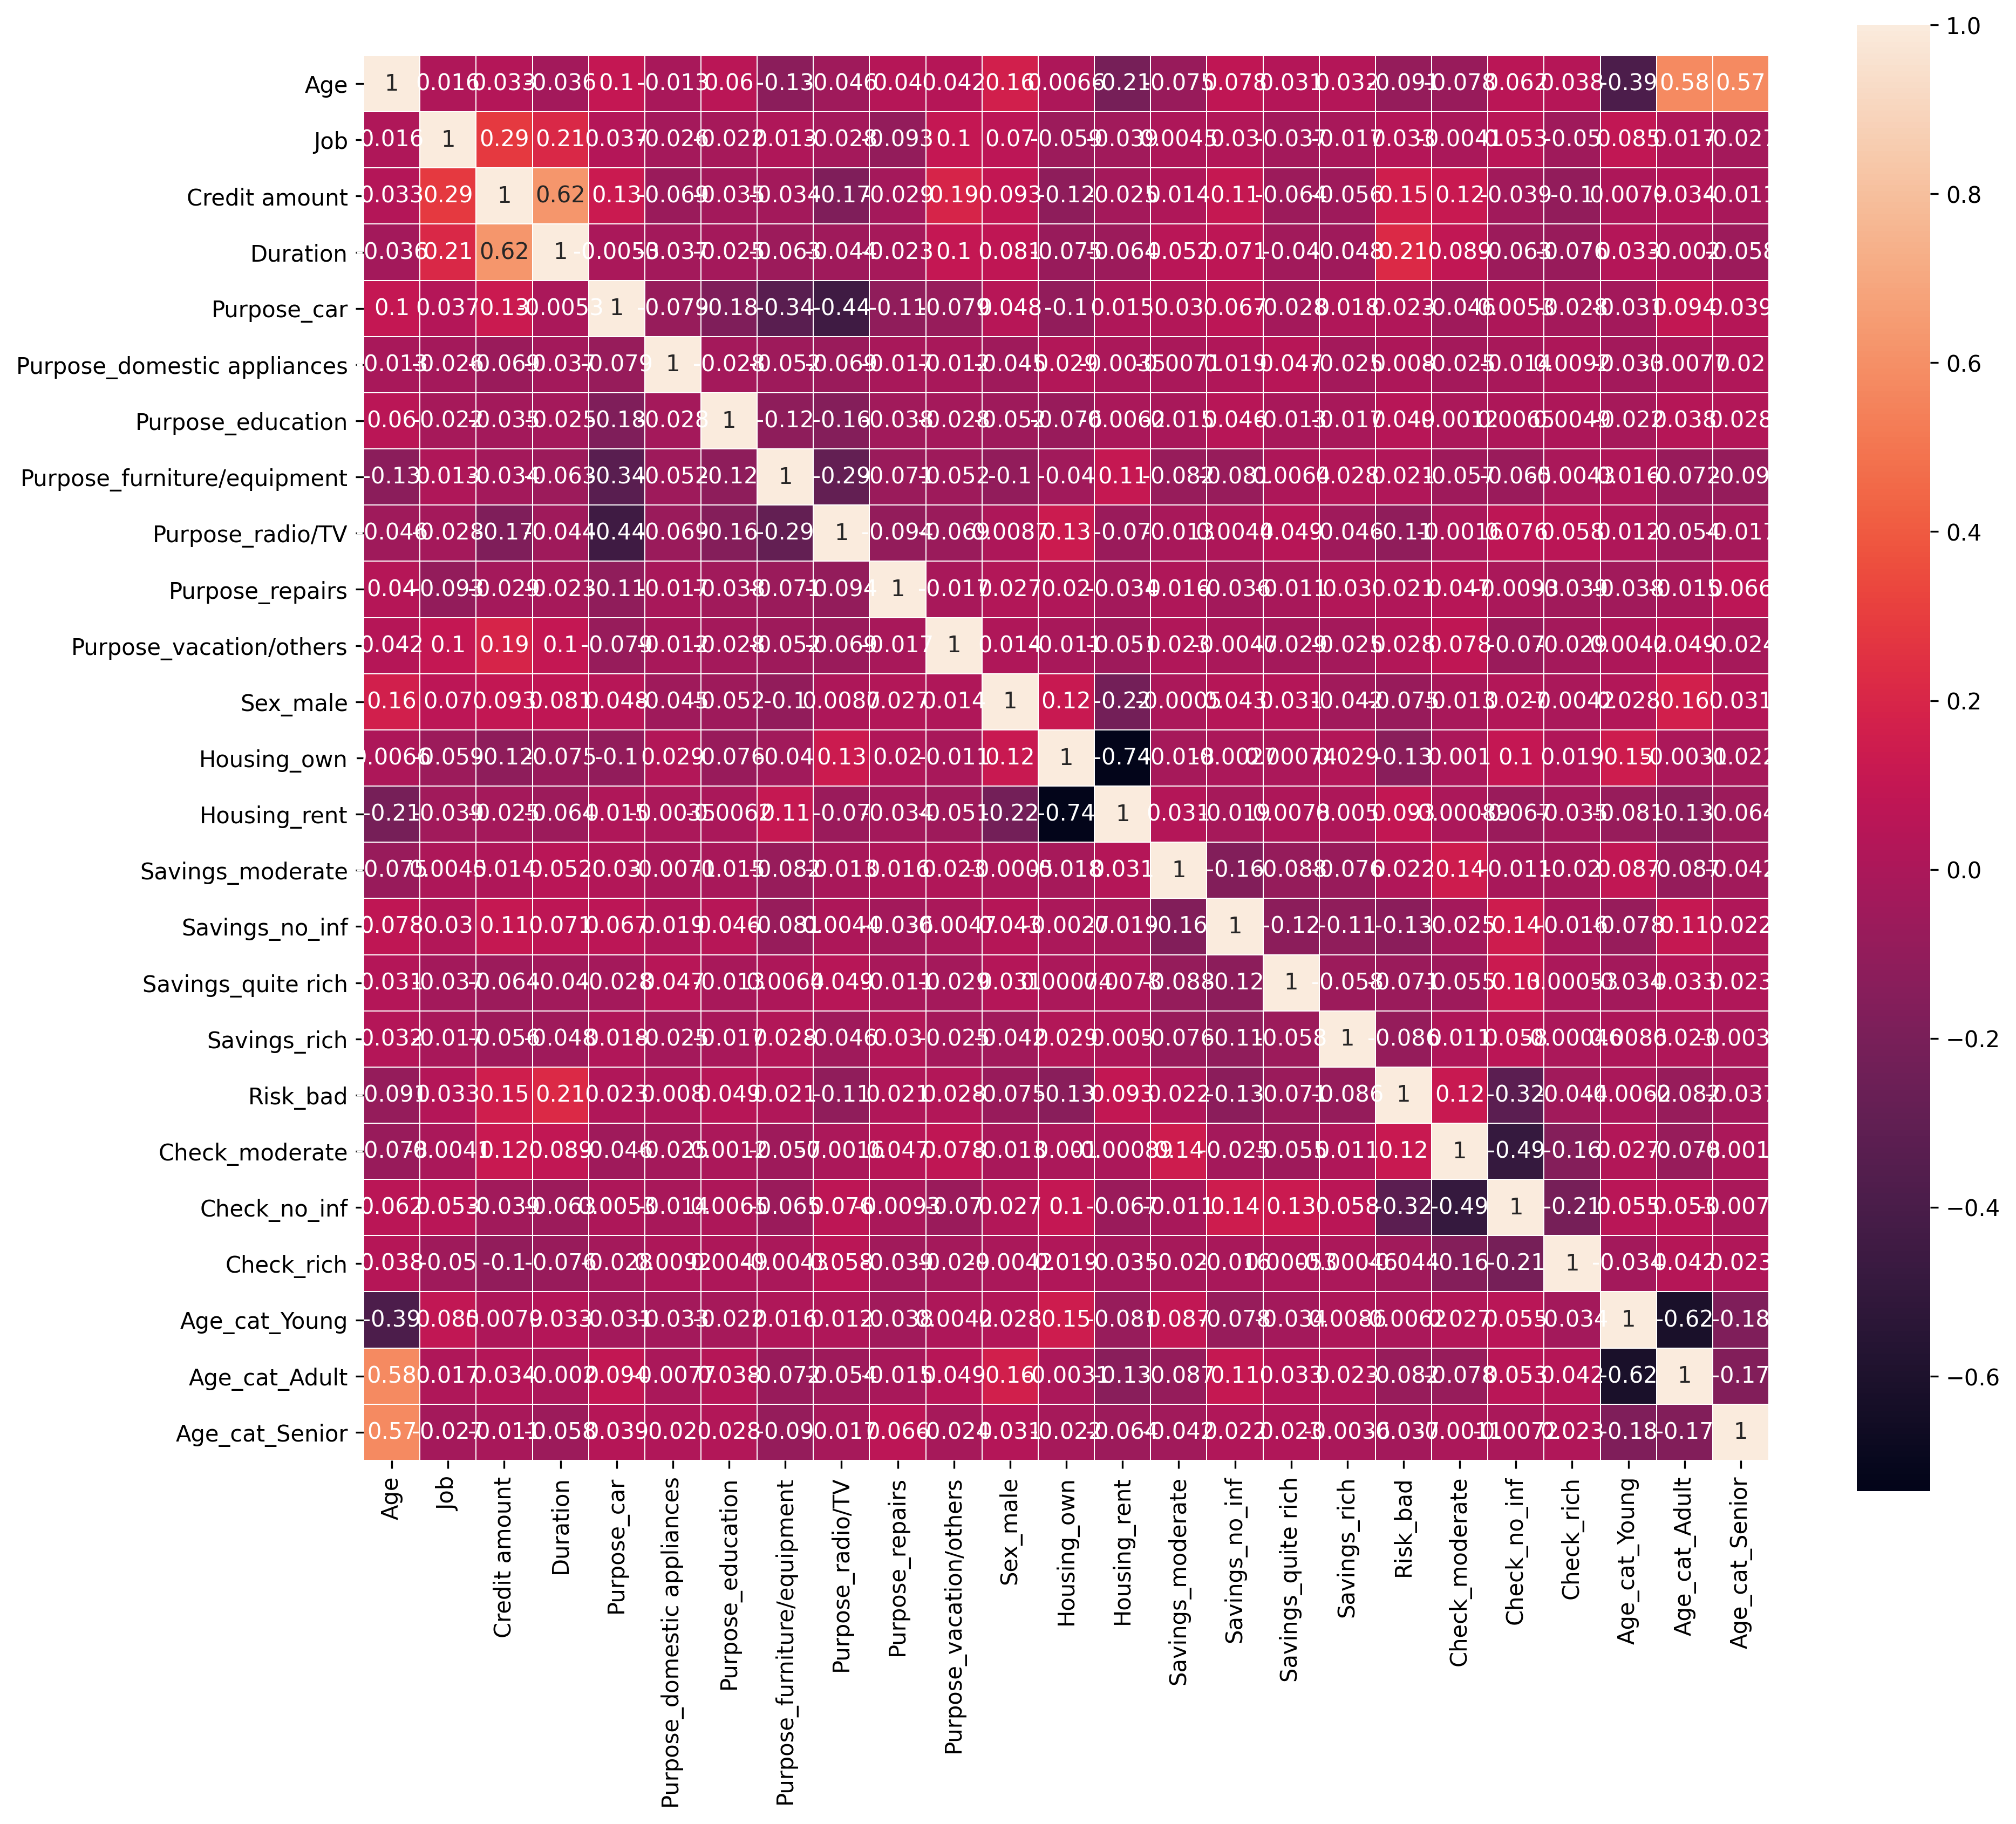

In [67]:
# Observing data correlation
plt.figure(figsize=(14,12))
sns.heatmap(df_credit.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True,  linecolor='white', annot=True)
plt.show()

In [21]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score # to split the data
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score #To evaluate our model

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [90]:
df_credit.describe()

Age          Job  Credit amount     Duration  Purpose_car  \
count  1000.000000  1000.000000    1000.000000  1000.000000  1000.000000   
mean     35.546000     1.904000    3271.258000    20.903000     0.337000   
std      11.375469     0.653614    2822.736876    12.058814     0.472921   
min      19.000000     0.000000     250.000000     4.000000     0.000000   
25%      27.000000     2.000000    1365.500000    12.000000     0.000000   
50%      33.000000     2.000000    2319.500000    18.000000     0.000000   
75%      42.000000     2.000000    3972.250000    24.000000     1.000000   
max      75.000000     3.000000   18424.000000    72.000000     1.000000   

       Purpose_domestic appliances  Purpose_education  \
count                   1000.00000        1000.000000   
mean                       0.01200           0.059000   
std                        0.10894           0.235743   
min                        0.00000           0.000000   
25%                        0.00000           0.000000   
50%                        0.00000           0.000000   
75%                        0.00000           0.000000   
max                        1.00000           1.000000   

       Purpose_furniture/equipment  Purpose_radio/TV  Purpose_repairs  ...  \
count                  1000.000000       1000.000000      1000.000000  ...   
mean                      0.181000          0.280000         0.022000  ...   
std                       0.385211          0.449224         0.146757  ...   
min                       0.000000          0.000000         0.000000  ...   
25%                       0.000000          0.000000         0.000000  ...   
50%                       0.000000          0.000000         0.000000  ...   
75%                       0.000000          1.000000         0.000000  ...   
max                       1.000000          1.000000         1.000000  ...   

       Savings_no_inf  Savings_quite rich  Savings_rich     Risk_bad  \
count      1000.00000         1000.000000   1000.000000  1000.000000   
mean          0.18300            0.063000      0.048000     0.300000   
std           0.38686            0.243085      0.213873     0.458487   
min           0.00000            0.000000      0.000000     0.000000   
25%           0.00000            0.000000      0.000000     0.000000   
50%           0.00000            0.000000      0.000000     0.000000   
75%           0.00000            0.000000      0.000000     1.000000   
max           1.00000            1.000000      1.000000     1.000000   

       Check_moderate  Check_no_inf   Check_rich  Age_cat_Young  \
count     1000.000000   1000.000000  1000.000000     1000.00000   
mean         0.269000      0.394000     0.063000        0.39800   
std          0.443662      0.488879     0.243085        0.48973   
min          0.000000      0.000000     0.000000        0.00000   
25%          0.000000      0.000000     0.000000        0.00000   
50%          0.000000      0.000000     0.000000        0.00000   
75%          1.000000      1.000000     0.000000        1.00000   
max          1.000000      1.000000     1.000000        1.00000   

       Age_cat_Adult  Age_cat_Senior  
count    1000.000000     1000.000000  
mean        0.367000        0.045000  
std         0.482228        0.207408  
min         0.000000        0.000000  
25%         0.000000        0.000000  
50%         0.000000        0.000000  
75%         1.000000        0.000000  
max         1.000000        1.000000  

[8 rows x 25 columns]

In [131]:
X = df_credit.drop('Risk_bad', 1)
y = df_credit['Risk_bad']

# Splitting X and y into train and test version
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=10)


In [97]:
X_train

Age  Job  Credit amount  Duration  Purpose_car  \
541   60    2           2032        24            1   
440   39    3           1884        12            1   
482   57    2           3622        30            0   
422   47    1            958        12            1   
778   38    3           5711        36            1   
..   ...  ...            ...       ...          ...   
106   39    3           6458        18            1   
270   32    2           2662        18            1   
860   27    2           5804        24            1   
435   25    2           1484        12            0   
102   24    2            932         6            0   

     Purpose_domestic appliances  Purpose_education  \
541                            0                  0   
440                            0                  0   
482                            0                  0   
422                            0                  0   
778                            0                  0   
..                           ...                ...   
106                            0                  0   
270                            0                  0   
860                            0                  0   
435                            0                  0   
102                            0                  0   

     Purpose_furniture/equipment  Purpose_radio/TV  Purpose_repairs  ...  \
541                            0                 0                0  ...   
440                            0                 0                0  ...   
482                            1                 0                0  ...   
422                            0                 0                0  ...   
778                            0                 0                0  ...   
..                           ...               ...              ...  ...   
106                            0                 0                0  ...   
270                            0                 0                0  ...   
860                            0                 0                0  ...   
435                            0                 1                0  ...   
102                            0                 1                0  ...   

     Savings_moderate  Savings_no_inf  Savings_quite rich  Savings_rich  \
541                 0               0                   0             0   
440                 0               0                   0             0   
482                 0               0                   0             1   
422                 0               0                   0             0   
778                 0               0                   0             1   
..                ...             ...                 ...           ...   
106                 0               0                   0             0   
270                 0               1                   0             0   
860                 0               0                   0             1   
435                 0               1                   0             0   
102                 0               0                   0             0   

     Check_moderate  Check_no_inf  Check_rich  Age_cat_Young  Age_cat_Adult  \
541               0             1           0              0              1   
440               0             1           0              0              1   
482               0             0           0              0              1   
422               1             0           0              0              1   
778               0             1           0              0              1   
..              ...           ...         ...            ...            ...   
106               0             1           0              0              1   
270               0             1           0              1              0   
860               0             1           0              1              0   
435               1             0           0              0              0   


In [132]:
# Training a RandomForest Classifier 
# model = RandomForestClassifier()
model = RandomForestClassifier(n_estimators=200)
model.fit(X_train, y_train.values.ravel())

# Obtaining predictions
y_hat = model.predict(X_test)

In [138]:
# Converting y_hat from Np to DF
predictions_col = pd.DataFrame()
predictions_col['predicted_class'] = y_hat.tolist()
predictions_col['true_class'] = y_test

# Calculating the errors with the absolute value 
predictions_col['errors'] = abs(predictions_col['predicted_class'] - predictions_col['true_class'])

# Rescaling the prediction errors with max error value of 1
# It doesn't matter whether the misclassification is between class 0 and 2 or between 0 and 1, it has the same error value. 
predictions_col['errors'] = predictions_col['errors'].replace(2.0, 1.0)

# Adding predictions to test data
entire_dataset = pd.merge(X_test, predictions_col, left_index = True, right_index = True)
errors = entire_dataset['errors']
df_out = entire_dataset.drop(['predicted_class', 'true_class', 'errors'], axis=1)

# The dataset
entire_dataset

Age  Job  Credit amount  Duration  Purpose_car  \
173   33    2           1414         8            0   
121   41    3           3868        24            1   
230   26    2           4210        36            0   
11    24    2           4308        48            0   
120   25    2           1835        21            0   
..   ...  ...            ...       ...          ...   
242   24    2           4605        48            1   
157   45    1            339        12            0   
35    25    1           4746        45            0   
293   56    2           4796        42            1   
260   27    2           1657        12            0   

     Purpose_domestic appliances  Purpose_education  \
173                            0                  0   
121                            0                  0   
230                            0                  0   
11                             0                  0   
120                            0                  0   
..                           ...                ...   
242                            0                  0   
157                            0                  1   
35                             0                  0   
293                            0                  0   
260                            0                  0   

     Purpose_furniture/equipment  Purpose_radio/TV  Purpose_repairs  ...  \
173                            0                 1                0  ...   
121                            0                 0                0  ...   
230                            0                 1                0  ...   
11                             0                 0                0  ...   
120                            0                 1                0  ...   
..                           ...               ...              ...  ...   
242                            0                 0                0  ...   
157                            0                 0                0  ...   
35                             0                 1                0  ...   
293                            0                 0                0  ...   
260                            1                 0                0  ...   

     Savings_rich  Check_moderate  Check_no_inf  Check_rich  Age_cat_Young  \
173             0               1             0           0              1   
121             0               0             1           0              0   
230             0               0             0           1              1   
11              0               0             0           0              0   
120             0               0             0           0              0   
..            ...             ...           ...         ...            ...   
242             0               0             0           0              0   
157             0               0             0           0              0   
35              0               1             0           0              0   
293             0               0             0           1              0   
260             0               0             0           0              1   

     Age_cat_Adult  Age_cat_Senior  predicted_class  true_class  errors  
173              0               0                0         0.0     0.0  
121              1               0                0         0.0     0.0  
230              0               0                0         1.0     1.0  
11               0               0                0         1.0     1.0  
120              0               0                0         1.0     1.0  
..             ...             ...              ...         ...     ...  
242              0               0                0         1.0     1.0  
157              1               0                0         0.0     0.0  
35               0               0                0         1.0     1.0  
293              1               0                0         0.0     0.0  
260              0 

In [134]:
len(entire_dataset.loc[entire_dataset['errors']==1])

34

In [135]:
testdata_features = entire_dataset.iloc[: , :24]
# np.mean(testdata_features.mean() - df_credit.mean())
testdata_features.mean()

Age                              33.776596
Job                               1.968085
Credit amount                  3026.936170
Duration                         22.308511
Purpose_car                       0.234043
Purpose_domestic appliances       0.000000
Purpose_education                 0.074468
Purpose_furniture/equipment       0.202128
Purpose_radio/TV                  0.351064
Purpose_repairs                   0.021277
Purpose_vacation/others           0.010638
Sex_male                          0.638298
Housing_own                       0.723404
Housing_rent                      0.202128
Savings_moderate                  0.095745
Savings_no_inf                    0.127660
Savings_quite rich                0.042553
Savings_rich                      0.106383
Check_moderate                    0.265957
Check_no_inf                      0.308511
Check_rich                        0.106383
Age_cat_Young                     0.436170
Age_cat_Adult                     0.287234
Age_cat_Sen

In [120]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Age                          1000 non-null   int64
 1   Job                          1000 non-null   int64
 2   Credit amount                1000 non-null   int64
 3   Duration                     1000 non-null   int64
 4   Purpose_car                  1000 non-null   uint8
 5   Purpose_domestic appliances  1000 non-null   uint8
 6   Purpose_education            1000 non-null   uint8
 7   Purpose_furniture/equipment  1000 non-null   uint8
 8   Purpose_radio/TV             1000 non-null   uint8
 9   Purpose_repairs              1000 non-null   uint8
 10  Purpose_vacation/others      1000 non-null   uint8
 11  Sex_male                     1000 non-null   uint8
 12  Housing_own                  1000 non-null   uint8
 13  Housing_rent                 1000 non-null   uint

<AxesSubplot:xlabel='Credit amount', ylabel='Age'>

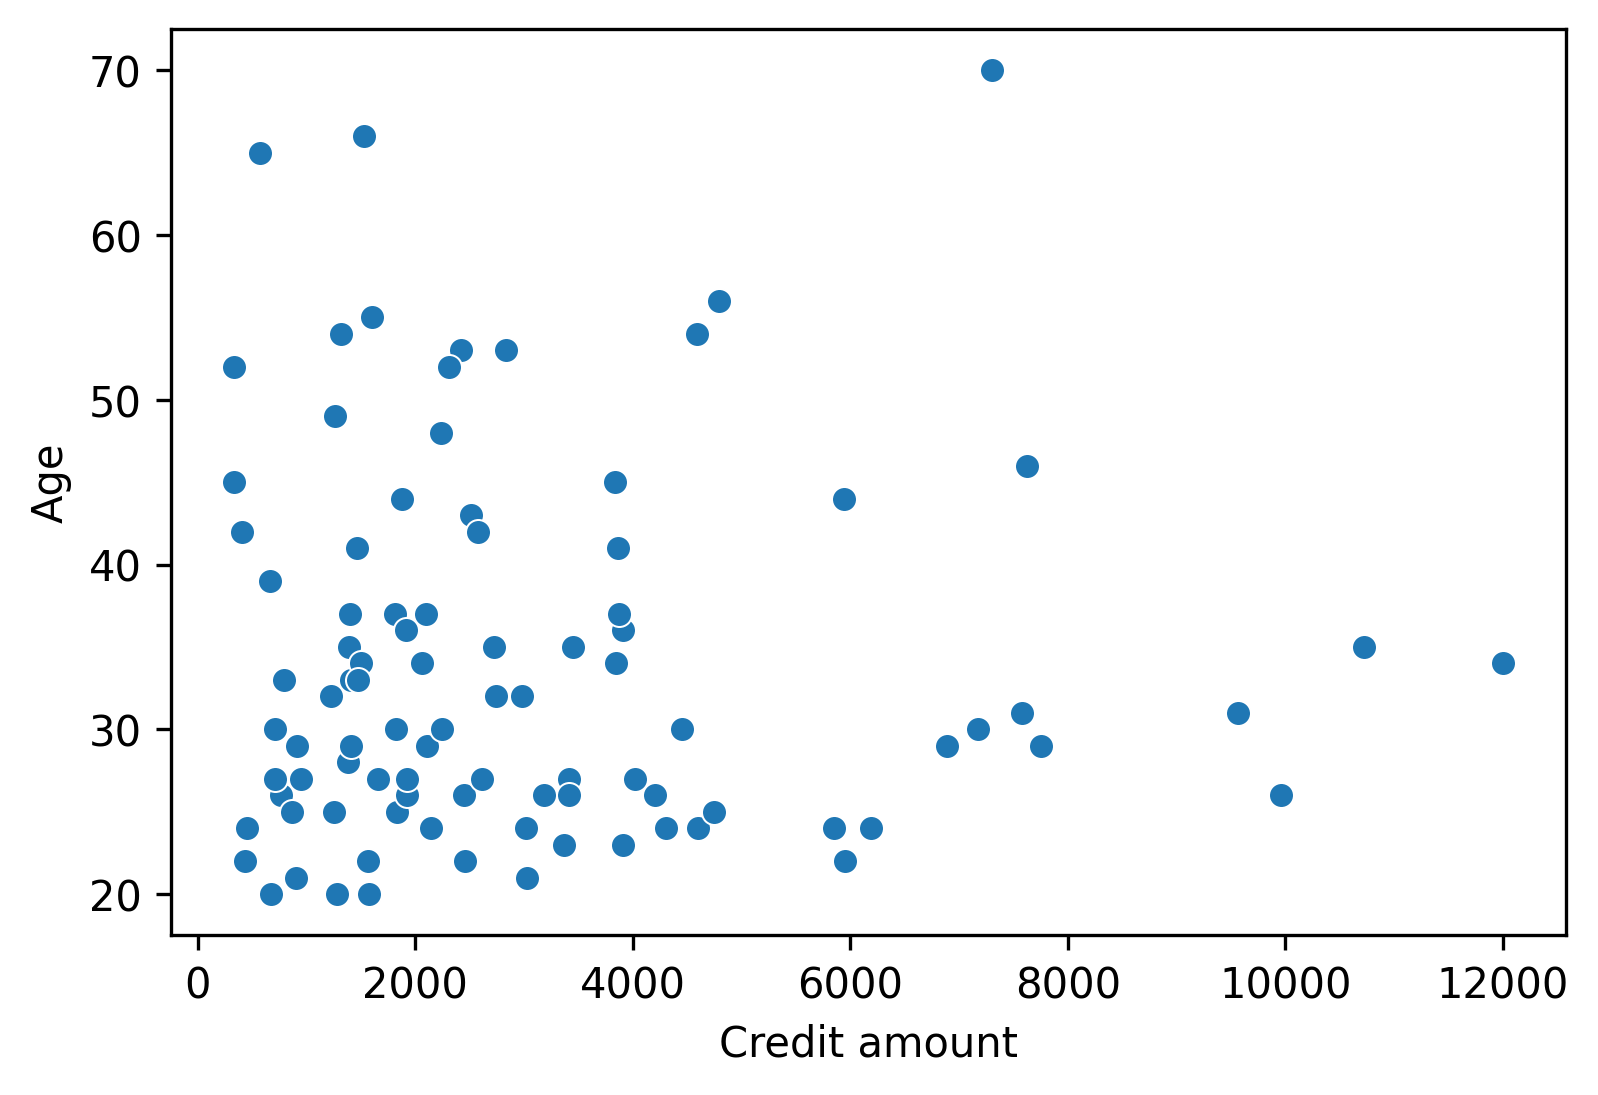

In [144]:
# data = entire_dataset

sns.scatterplot(data=entire_dataset, x='Credit amount', y='Age')

In [26]:
# Exporting the preprocessed dataset
import os
path = r'..\\Preprocessed_datasets\\'
# entire_dataset.to_csv(os.path.join(path, r'final_preprocessed_german_credit2.csv'))

